In [31]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import matplotlib.style
from scipy.signal import argrelextrema

plt.style.use('ggplot')

In [32]:
df = pd.read_csv('../../Data_Forex/EURUSD/EURUSD_H4 - EURUSD_H4.csv',
                 index_col=0,
                 parse_dates=True)

df

,Open,High,Low,Close,Volume
Time,,,,,
2007-03-05 12:00:00,1.30956,1.31145,1.30723,1.30979,185987
2007-03-05 16:00:00,1.30960,1.31112,1.30833,1.30981,1025327
2007-03-05 20:00:00,1.30979,1.30986,1.30782,1.30840,235967
2007-03-06 00:00:00,1.30813,1.31113,1.30798,1.31071,191415
2007-03-06 04:00:00,1.31078,1.31262,1.30923,1.31211,187099
...,...,...,...,...,...
2023-03-10 00:00:00,1.05855,1.05993,1.05791,1.05967,62976
2023-03-10 04:00:00,1.05967,1.06066,1.05809,1.05948,58412
2023-03-10 08:00:00,1.05946,1.06036,1.05738,1.05894,86765


In [33]:
df

,Open,High,Low,Close,Volume
Time,,,,,
2007-03-05 12:00:00,1.30956,1.31145,1.30723,1.30979,185987
2007-03-05 16:00:00,1.30960,1.31112,1.30833,1.30981,1025327
2007-03-05 20:00:00,1.30979,1.30986,1.30782,1.30840,235967
2007-03-06 00:00:00,1.30813,1.31113,1.30798,1.31071,191415
2007-03-06 04:00:00,1.31078,1.31262,1.30923,1.31211,187099
...,...,...,...,...,...
2023-03-10 00:00:00,1.05855,1.05993,1.05791,1.05967,62976
2023-03-10 04:00:00,1.05967,1.06066,1.05809,1.05948,58412
2023-03-10 08:00:00,1.05946,1.06036,1.05738,1.05894,86765


In [34]:
price = df['Close']
order = 100

In [35]:
min_points = argrelextrema(price.values, np.less_equal, order = order)
min_points

(array([    2,   445,   728,  1288,  1430,  1906,  2069,  2744,  3233,
         3441,  3691,  4174,  4314,  4532,  4794,  4948,  5267,  5616,
         6053,  6227,  6385,  6818,  7041,  7413,  7870,  8136,  8486,
         8717,  9210,  9443,  9803, 10033, 10263, 10524, 10811, 11173,
        11177, 11455, 11761, 12258, 12748, 12963, 13092, 13290, 13524,
        14133, 14267, 14521, 14751, 14909, 15026, 15158, 15331, 15817,
        16101, 16306, 16623, 17242, 17742, 18136, 18237, 18479, 18873,
        19378, 19593, 19751, 20026, 20168, 20293, 20492, 20921, 21045,
        21202, 21886, 22046, 22462, 22698, 23332, 23565, 23755, 24045,
        24209, 24506, 24770, 25116, 25564, 25829], dtype=int64),)

In [36]:
max_points = argrelextrema(price.values, np.greater_equal, order = order)
max_points

(array([  248,   616,  1168,  1480,  1671,  1835,  2044,  2206,  2512,
         2900,  3304,  3634,  3917,  4270,  4415,  4619,  4908,  5034,
         5543,  5941,  6333,  6743,  6889,  7002,  7252,  7522,  8068,
         8213,  8344,  8567,  8952,  9095,  9568,  9958, 10170, 10449,
        10744, 11021, 11350, 11480, 11599, 11831, 12318, 12579, 13243,
        13389, 13683, 13794, 13912, 14182, 14434, 14792, 14958, 15272,
        15634, 15766, 16014, 16245, 16550, 16979, 17329, 17683, 17852,
        18312, 18644, 19126, 19434, 19555, 19858, 20442, 20694, 20995,
        21235, 21410, 21773, 22327, 22551, 22946, 23238, 23398, 23637,
        24076, 24316, 24580, 24908, 25050, 25680], dtype=int64),)

In [37]:
df['min'] = None
df['max'] = None
df['min'] = df['min'].iloc[argrelextrema(price.values, np.less_equal, order = order)[0]]
df['max'] = df['min'].iloc[argrelextrema(price.values, np.greater_equal, order = order)[0]]

In [38]:
# Assuming you have a DataFrame named 'df' and a price array named 'price'

# Finding the indices of local minima and maxima in the 'price' array
minima_indices = argrelextrema(price.values, np.less_equal, order=order)[0]
maxima_indices = argrelextrema(price.values, np.greater_equal, order=order)[0]

# Assigning the local minima to the 'min' column in the DataFrame 'df'
df['min'] = None
df.loc[df.index[minima_indices], 'min'] = price.iloc[minima_indices]

# Assigning the local maxima to the 'max' column in the DataFrame 'df'
df['max'] = None
df.loc[df.index[maxima_indices], 'max'] = price.iloc[maxima_indices]

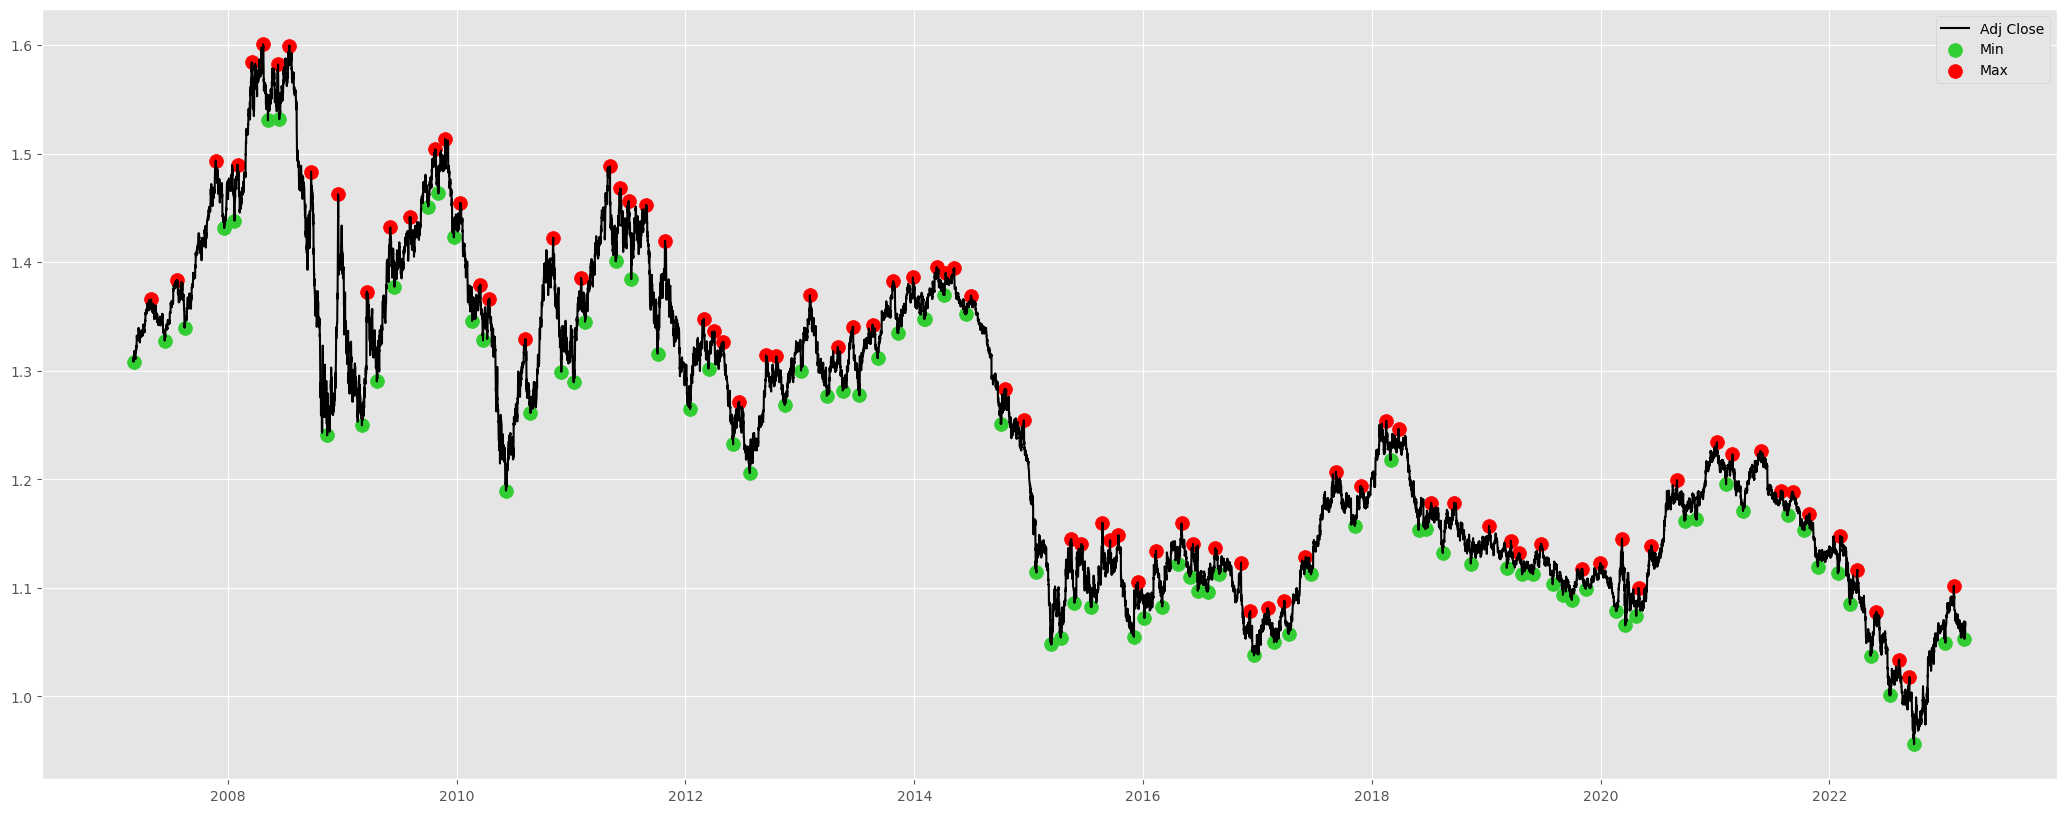

In [39]:
plt.figure(figsize = (26, 10))
plt.plot(price, label = 'Adj Close', color = 'black')
plt.scatter(df.index, df['min'], label = 'Min', color = 'limegreen', s = 100)
plt.scatter(df.index, df['max'], label = 'Max', color = 'red', s = 100)
plt.legend()